In [1]:
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from collections import Counter

import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Endocrine factors overexpression

In [2]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/d0/"
filenames=os.listdir(base_dir)

In [3]:
filenames.sort()

In [11]:
filenames=[filenames[24],filenames[26],filenames[28]]

In [12]:
filenames

['control1_0_over.pt', 'control1_1_over.pt', 'control1_2_over.pt']

In [13]:
genes=[]
for name in filenames:
    genes.append(str(name).split("_")[0])
genes=np.unique(genes)

In [14]:
all_results = []
for elt in filenames:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        all_results.append(results)

In [25]:
endo_dist = []
exo_dist = []
alpha_dist = []
for results in all_results:
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)
    
    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

        
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    

In [26]:
test=np.array(endo_dist)

In [27]:
unpert_average=np.concatenate(test[:,0],axis=0) #np.average(test[:,0],axis=0)

In [28]:
endo_dist[0][1]

array([0.45 , 0.43 , 0.475, 0.46 , 0.435, 0.48 , 0.565, 0.48 , 0.43 ,
       0.41 ])

In [29]:
endo_dist_all =[]
for i in range(0,len(filenames), 3):
    print(i)
    endo_dist_norm = [unpert_average]
    for _ in range(1):
        endo_dist_norm.append(endo_dist[i][1])
        endo_dist_norm.append(endo_dist[i+1][1])
        endo_dist_norm.append(endo_dist[i+2][1])
    endo_dist_all.append(endo_dist_norm)

0


0.6512458594325223
0.0071666666666666545
0.5572601132814434
0.007666666666666544
0.4332547047129518
0.012666666666666604


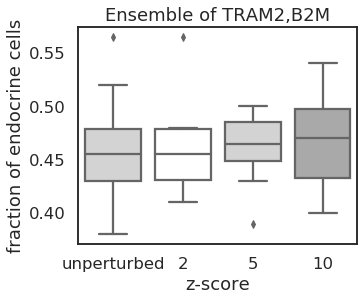

In [35]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.4,0.7)
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    print(p)
    print(np.average(endo_dist_all[i][j])-np.average(endo_dist_all[i][0]))
    x1, x2 = 0,j
    if p < .05:
        y=.6
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(endo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "2","5","10"])
box.set_ylabel("fraction of endocrine cells")
ax.set_xlabel("z-score")
plt.show()

In [31]:
test=np.array(exo_dist)

In [32]:
unpert_average=np.concatenate(test[:,0],axis=0)

In [33]:
exo_dist_all =[]
for i in range(1):
    exo_dist_norm = [unpert_average]
    for _ in range(1):
        exo_dist_norm.append(exo_dist[i][1])
        exo_dist_norm.append(exo_dist[i+1][1])
        exo_dist_norm.append(exo_dist[i+2][1])
    exo_dist_all.append(exo_dist_norm)

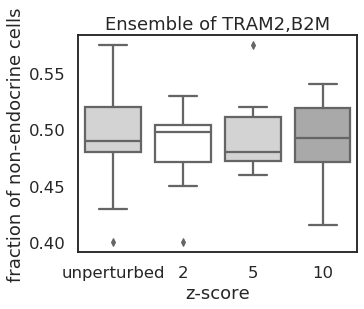

In [36]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.2,0.45)
#stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
stat, p = scipy.stats.ttest_ind(exo_dist_all[0][0], exo_dist_all[0][3])
x1, x2 = 0,1
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        y=.65
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(exo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed","2","5","10"])
box.set_ylabel("fraction of non-endocrine cells")
ax.set_xlabel("z-score")
plt.show()

# Control timing

In [4]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/"
filenames=os.listdir(base_dir)
filenames.sort()

In [6]:
differences=[]
paired_t=[]
for elt in filenames:
    print(elt)
    files=os.listdir(base_dir+elt)
    files.sort()
    results=torch.load(base_dir+elt+"/"+files[28])
    all_results = []
    all_results.append(results)
    endo_dist = []
    exo_dist = []
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)

    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

    
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    differences.append(endo_dist[0][1]-endo_dist[0][0])
    #differences.append(cohen_d(endo_dist[0][1], endo_dist[0][0]))

d0
d1
d2
d3
d4
d5
d6


Text(0.5, 0, 'Day (introduction of silico perturbation)')

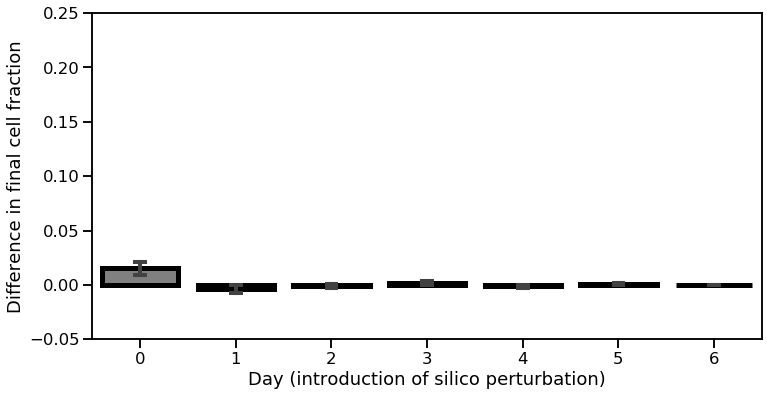

In [10]:
fig, ax = plt.subplots(figsize=(12,6), sharex=True, sharey=True)
#plt.bar(np.arange(0,8,1),differences)
sns.set_context("talk")
ax.set_ylim(-0.05,0.25)
#ax.title.set_text("Overexpression (z=5) introduced at different timepoints")
mypal=["grey"]
g=sns.barplot(data=differences, palette=mypal, linewidth=5, edgecolor="k",capsize=.1)
#plt.bar(np.arange(0,8,1),differences)
g.set_ylabel("Difference in final cell fraction")
g.set_xlabel("Day (introduction of silico perturbation)")
#ax.table([np.average(differences, axis=1), np.std(differences, axis=1)])